<a href="https://colab.research.google.com/github/ChenghaoXu1718/SEP-788-789/blob/main/SEP788LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
#load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

                      

65536/57026 [==================================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y = lr.predict(x_test)
print(lr.score(x_test,y_test))


0.7213535934621562


In [ ]:
x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)
x_train_norm = (x_train - x_mean) / x_std
pd.DataFrame(x_train_norm).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


In [ ]:
print(x_train.shape[1])


13


Build Model

In [ ]:
from tensorflow.python.keras.activations import relu
def build_model():
  model = keras.Sequential([
      Dense(20, activation=tf.nn.relu, input_shape=[x_train.shape[1]]),
      Dense(1)
  ])

  model.compile(optimizer=tf.optimizers.Adam(),
                loss='mse',
                metrics=['mse', 'mae'])
  return model


Train model

In [ ]:
from gc import callbacks
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(x_train_norm, y_train, epochs=1000, verbose=0, validation_split=0.1, callbacks=[early_stop])

hist = pd.DataFrame(history.history)
hist["epochs"] = history.epoch

rmse = np.sqrt(float(hist['val_loss'].tail(1)))
print(rmse)

2.4521528127761147


Plot

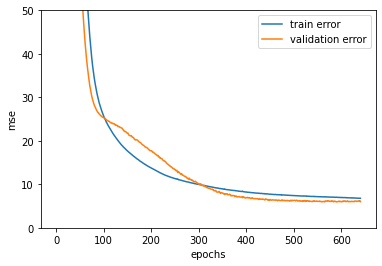

In [ ]:
def plot_history():
  plt.figure()
  plt.xlabel("epochs")
  plt.ylabel("mse")
  plt.plot(hist['epochs'], hist['loss'], label = "train error")
  plt.plot(hist['epochs'], hist['val_loss'], label = "validation error")
  plt.legend()
  plt.ylim(0,50)

plot_history()


Model evaluation

In [ ]:
x_test_norm = (x_test-x_mean)/x_std

mse, _, _ = model.evaluate(x_test_norm, y_test)

rmse_test = np.sqrt(mse)
print()

4/4 [==============================] - 0s 3ms/step - loss: 16.9467 - mse: 16.9467 - mae: 2.8113

